### Part 1

In [1]:
import os
import re
import pandas as pd
import tensorflow as tf
from tensorflow.keras import utils

In [2]:
data_set = tf.keras.utils.get_file(
    fname="imdb.tar.gz", #download file name
    origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz",
    extract = True
)

84125825/84125825 [==============================] - 7s 0us/step


In [3]:
data_set

'/root/.keras/datasets/imdb.tar.gz'

In [4]:
def directory_data(directory):
  data = {}
  data["review"] = []
  for file_path in os.listdir(directory):
    with open(os.path.join(directory, file_path), "r", encoding='utf-8') as file:
      data["review"].append(file.read())
  return pd.DataFrame.from_dict(data)

In [5]:
def data(directory):
  pos_df = directory_data(os.path.join(directory, "pos"))
  neg_df = directory_data(os.path.join(directory, "neg"))
  pos_df["sentiment"] = 1
  neg_df["sentiment"] = 0
  return pd.concat([pos_df, neg_df])

In [6]:
train_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "train"))
test_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "test"))

### Part 2

In [7]:
train_df.head()

,review,sentiment
0,Trailers of this movie may show scenes of viol...,1
1,I sense out there a mix of confusion and varyi...,1
2,"Brando plays the ace jet pilot, just back from...",1
3,"The planning episodes were a bit dull, but whe...",1
4,A prequel to the re-imagined Battlestar Galact...,1


In [8]:
train_df.head()
reviews = list(train_df['review'])

# 문자열 문장 리스트를 토큰화
tokenized_reviews = [r.split() for r in reviews]
# 토큰화된 리스트에 대한 각 길이를 저장
review_len_by_token = [len(t) for t in tokenized_reviews]
# 토큰화된 것을 붙여서 음절의 길이를 저장
review_len_by_alphabet = [len(s.replace(' ', '')) for s in reviews]

### Part 3

Text(0, 0.5, 'Number of Reviews')

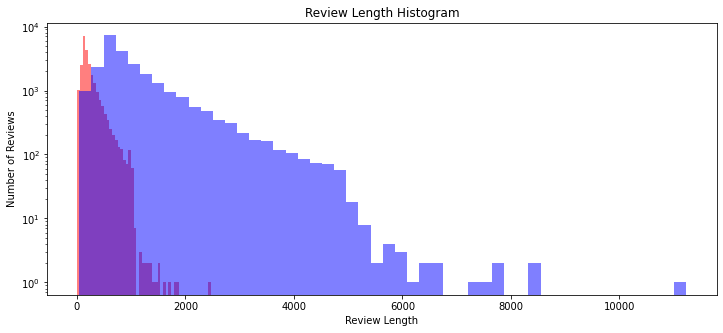

In [ ]:
import matplotlib.pyplot as plt
# 이미지 사이즈 선언, figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(review_len_by_token, bins=50, alpha=0.5, color= 'r', label='word')
plt.hist(review_len_by_alphabet, bins=50, alpha=0.5, color= 'b', label='alphabet')
plt.yscale('log')
# 그래프 제목, x축 라벨, y축 라벨
plt.title('Review Length Histogram')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')

In [ ]:
### Part 4

In [9]:
import numpy as np
print('문장 최대길이: ', np.max(review_len_by_token))
print('문장 최소길이: ', np.min(review_len_by_token))
print('문장 평균길이: ', np.mean(review_len_by_token))
print('문장 길이 표준편차: ', np.std(review_len_by_token))
print('문장 중간길이: ', np.median(review_len_by_token))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('제 1 사분위 길이: ', np.percentile(review_len_by_token, 25))
print('제 3 사분위 길이: ', np.percentile(review_len_by_token, 75))

문장 최대길이:  2470
문장 최소길이:  10
문장 평균길이:  233.7872
문장 길이 표준편차:  173.72955740506563
문장 중간길이:  174.0
제 1 사분위 길이:  127.0
제 3 사분위 길이:  284.0


###Part 5

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0683b695b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0683b69af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0683b69310>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0683af3070>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0683af35b0>],
 'means': [<matplotlib.lines.Line2D at 0x7f0683af3310>]}

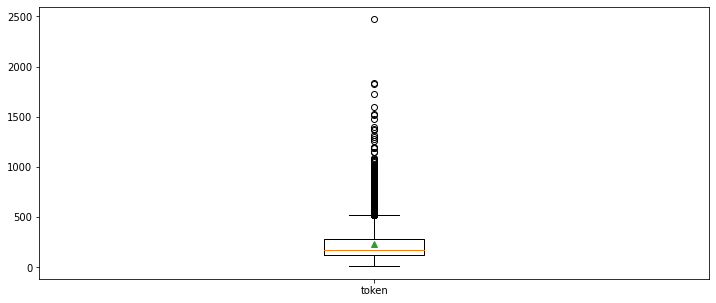

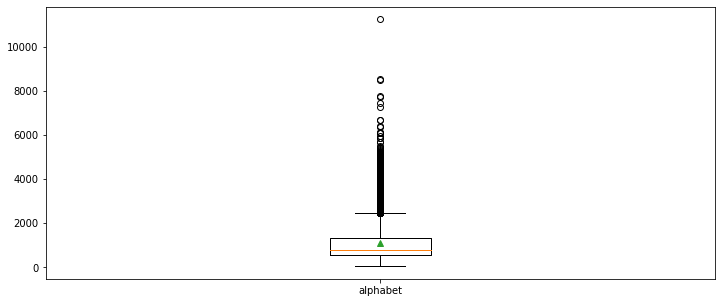

In [ ]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라미터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함
plt.boxplot([review_len_by_token],
            labels=['token'],
            showmeans=True
            )
plt.figure(figsize=(12, 5))
plt.boxplot([review_len_by_alphabet],
            labels=['alphabet'],
            showmeans=True
            )

###Part 6 

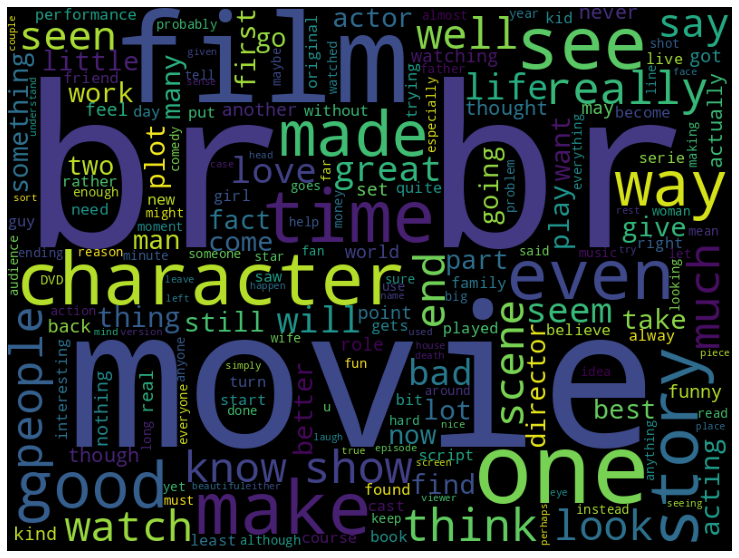

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'black', 
                      width = 800, height = 600).generate(' '.join(train_df['review']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

###Part 7